### 引入資料

In [26]:
import numpy as np
dbz_min = 45;
dbz_max = 60;
dbz_bright = (dbz_max - dbz_min)*np.random.rand(500) + dbz_min

dbz_min = 10
dbz_max = 30
dbz_ice = (dbz_max - dbz_min)*np.random.rand(500) + dbz_min

dbz_min = 10
dbz_max = 50
dbz_warm = (dbz_max - dbz_min)*np.random.rand(500) + dbz_min

raw_dbz = np.concatenate([dbz_bright, dbz_ice, dbz_warm])
raw_dbz = raw_dbz.reshape((1500,1))

print(raw_dbz.shape)

(1500, 1)


In [27]:
temp_min = -5
temp_max = 5
temp_bright = (temp_max - temp_min)*np.random.rand(500) + temp_min


temp_min = -20
temp_max = 2
temp_ice = (temp_max - temp_min)*np.random.rand(500) + temp_min

temp_min = -2
temp_max = 20
temp_warm = (temp_max - temp_min)*np.random.rand(500) + temp_min

raw_temp = np.concatenate([temp_bright, temp_ice, temp_warm])
raw_temp = raw_temp.reshape((1500,1))

print(raw_temp.shape)

(1500, 1)


In [28]:
x_train = np.concatenate([raw_temp, raw_dbz], axis=1)

In [29]:
y1 = np.zeros(500, dtype=int)
y2 = np.ones(500, dtype=int)
y3 = np.ones(500, dtype=int) + 1
y_train = np.concatenate([y1, y2, y3])

import tensorflow as tf
y_train2 = tf.keras.utils.to_categorical(y_train)

print(y_train2.shape)

(1500, 3)


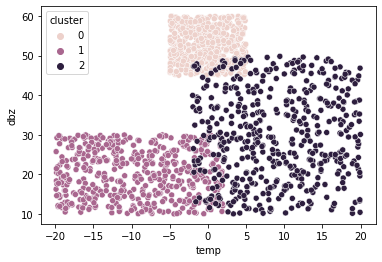

In [36]:
import pandas as pd

dfx = pd.DataFrame(x_train, columns=['temp', 'dbz'])

dfy = pd.DataFrame(y_train, columns=['cluster'])

import seaborn as sns
ax = sns.scatterplot(x=dfx['temp'], y=dfx['dbz'], hue=dfy['cluster'])

### 訓練模型

In [39]:
"""
activation: https://keras.io/zh/activations/
"""
model = tf.keras.Sequential()

# input layer: 50個神經元, 激活函數使用relu, 輸入一維資料
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu,input_dim=2))

# output layer: 3個神經元(代表3個結果), 激活函數使用softmax
model.add(tf.keras.layers.Dense(units=3,activation=tf.nn.softmax))

"""
optimizaer: https://keras.io/zh/optimizers/
metrics: https://keras.io/zh/metrics/
loss: https://keras.io/zh/losses/
"""
#model.compile(optimizer='adam',
#       loss = tf.keras.losses.categorical_crossentropy,
#       metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy'])

model.summary()

"""
Param #: (input_dim+1)*units
"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


'\nParam #: (input_dim+1)*units\n'

In [ ]:
history = model.fit(x_train, y_train2, epochs=20, batch_size=64)

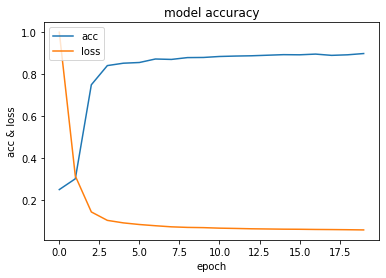

In [41]:
loss = np.array(history.history['loss'], dtype='float64')
loss = loss/max(loss)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(loss)
plt.title('model accuracy')
plt.ylabel('acc & loss')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

### 評估正確率

In [42]:
dbz_min = 45;
dbz_max = 60;
dbz_bright = (dbz_max - dbz_min)*np.random.rand(3) + dbz_min

dbz_min = 10
dbz_max = 30
dbz_ice = (dbz_max - dbz_min)*np.random.rand(3) + dbz_min

dbz_min = 10
dbz_max = 50
dbz_warm = (dbz_max - dbz_min)*np.random.rand(3) + dbz_min

raw_dbz = np.concatenate([dbz_bright, dbz_ice, dbz_warm])
raw_dbz = raw_dbz.reshape((9,1))

#########################
temp_min = -5
temp_max = 5
temp_bright = (temp_max - temp_min)*np.random.rand(3) + temp_min


temp_min = -20
temp_max = 2
temp_ice = (temp_max - temp_min)*np.random.rand(3) + temp_min

temp_min = -2
temp_max = 20
temp_warm = (temp_max - temp_min)*np.random.rand(3) + temp_min

raw_temp = np.concatenate([temp_bright, temp_ice, temp_warm])
raw_temp = raw_temp.reshape((9,1))

########################
x_test = np.concatenate([raw_temp, raw_dbz], axis=1)

########################
y1 = np.zeros(3, dtype=int)
y2 = np.ones(3, dtype=int)
y3 = np.ones(3, dtype=int) + 1
y_test = np.concatenate([y1, y2, y3])

y_test2 = tf.keras.utils.to_categorical(y_test)

#########################
score = model.evaluate(x_test, y_test2, batch_size=128)
print("score:",score)

1/1 [==============================] - 0s 156ms/step - loss: 0.2962 - accuracy: 0.8889
score: [0.2962275743484497, 0.8888888955116272]


### 預測

In [56]:
predict = model.predict(x_test)

In [58]:
print("第一個測試資料:", x_test[0])
print("0 機率:",predict[0, 0])
print("1 機率:",predict[0, 1])
print("2 機率:",predict[0, 2])
print("Ans:",np.argmax(predict[0])) # np.argmax() 返回最大值索引號

第一個測試資料: [ 2.40892747 45.33483827]
0 機率: 0.7265635
1 機率: 0.03247282
2 機率: 0.2409637
Ans: 0


In [59]:
print("第四個測試資料:", x_test[3])
print("0 機率:",predict[3, 0])
print("1 機率:",predict[3, 1])
print("2 機率:",predict[3, 2])
print("Ans:",np.argmax(predict[3])) # np.argmax() 返回最大值索引號

第四個測試資料: [-1.1654097  22.07588325]
0 機率: 0.42267153
1 機率: 0.34500948
2 機率: 0.23231894
Ans: 0


In [61]:
print("第七個測試資料:", x_test[6])
print("0 機率:",predict[6, 0])
print("1 機率:",predict[6, 1])
print("2 機率:",predict[6, 2])
print("Ans:",np.argmax(predict[6])) # np.argmax() 返回最大值索引號

第七個測試資料: [ 5.89735932 29.59453018]
0 機率: 0.05130436
1 機率: 0.010945767
2 機率: 0.9377499
Ans: 2
